

**<center><h1>UIT1604: Machine Learning Fundamentals</h1><center>**


---


Mini Project - Performance Analysis of various Classification Algorithms on the 
**Fashion MNIST**(Modified National Institute of Standards and Technology) dataset

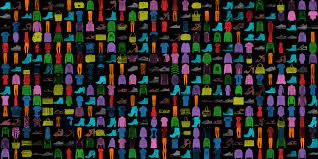













**CONTRIBUTORS**

1. Raghavan Ramesh - 205002071
2. Sahithi M R - 205002076
3. Saravanakumar M - 205002081
4. Saravanan J - 205002083
5. Siddarthan K - 205002091

<h1>About Dataset</h1>


<h3>Context</h3>
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others." Zalando seeks to replace the original MNIST dataset.


<h3>Content</h3>
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


<h3>Labels</h3>
Each training and test example is assigned to one of the following labels:

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

<h3>Dataset Source</h3>
TensorFlow Datasets is a collection of datasets that are ready to use - Fashion MNIST is one such dataset.


<h3>More</h3>
Image data should be converted to CSV data.


**<H1>EXPLORATORY DATA ANALYSIS</H1>**


---
EDA is primarily used to see what data can reveal beyond the formal modelling or hypothesis testing task and provides a better understanding of dataset variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today


**<h4>Step 1: Import the necessary modules</h4>**


---


We will be needing NumPy, Matplotlib, Pandas and TensorFlow for our implementations.

**<h5>NumPy</h5>**

*NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. NumPy was created in 2005 by Travis Oliphant. It is an open source project and we can use it freely. NumPy stands for Numerical Python.*

**<h5>Matplotlib</h5>**

*Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, Python/IPython shells, web application servers, and various graphical user interface toolkits.*

**<h5>Pandas</h5>**

*Pandas is a Python package that provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language.*

**<h5>TensorFlow</h5>**

*TensorFlow is an open source software library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices. Originally developed by researchers and engineers from the Google Brain team within Google's AI organization, it comes with strong support for machine learning and deep learning and the flexible numerical computation core is used across many other scientific domains.*

**<h5>Scikit-learn</h5>**

*Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib. Rather than focusing on loading, manipulating and summarising data, Scikit-learn library is focused on modeling the data. Some of the most popular groups of models provided by Sklearn are supervised learning algorithms, unsupervised learning algorithms, dimensionality reduction, ensemble methods etc.*


In [76]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


**<h4>Step 2: Load the Dataset</h4>**


---

Check the dimensions of the dataset(training set size, testing set size etc.)

In [77]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [78]:
# Check the dimensions of the dataset
print("Train set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Train set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


Let us visualise some sample images from the dataset.

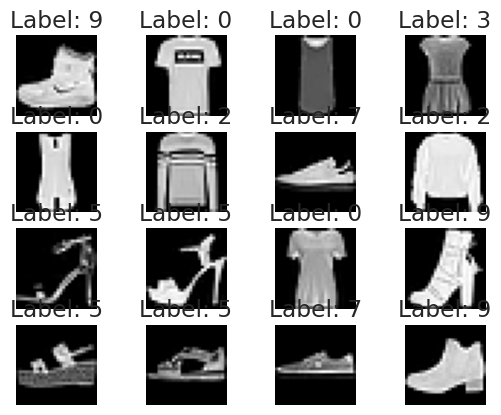

In [79]:
# Visualize some sample images
fig, ax = plt.subplots(nrows=4, ncols=4)
for i, axi in enumerate(ax.flat):
    axi.imshow(x_train[i], cmap='gray')
    axi.set_title(f"Label: {y_train[i]}")
    axi.axis('off')
plt.show()

Let us attempt to plot the distribution/count of different classes in the dataset.

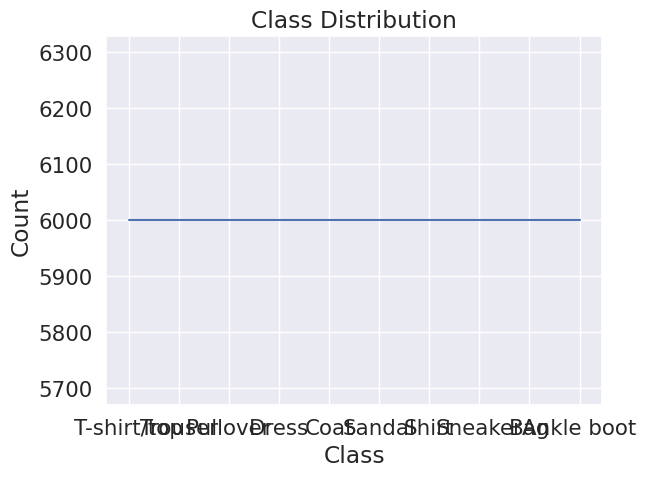

In [80]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_counts = np.unique(y_train, return_counts=True)[1]
plt.plot(class_names, class_counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Inference: Looking at this graph, we can infer that each of the 10 classes has the same amount of images(6000).

Let us check for missing values in the dataset. If they are present, let us attempt to handle them.

In [81]:
# Check for missing values
print("Missing values:", pd.isnull(x_train).sum())


Missing values: 0


Inference: no missing values are present, we do not need to handle them.

Let us visualise the pixel value distribution across the entire dataset.

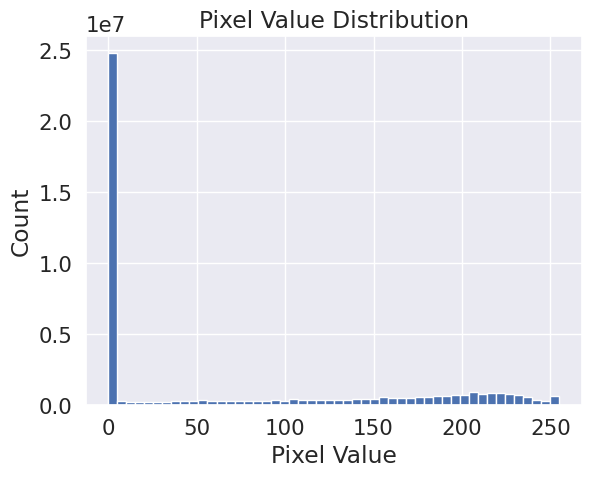

In [82]:
# Visualize the pixel values
plt.hist(x_train.flatten(), bins=50)
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()

Inference: Pixel Value 0(corresponding to black) has the largest distribution across the dataset, which makes sense. Observing the sample images of the dataset that we printed out, black is the dominant colour.

Let us attempt to plot a confusion matrix.

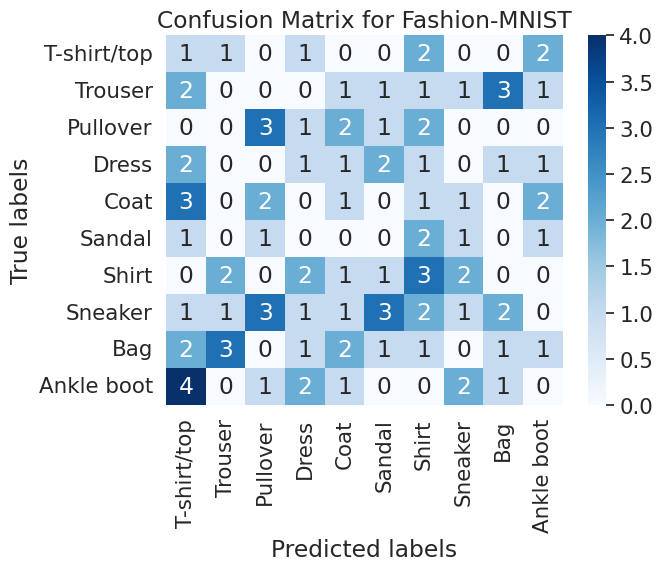

In [83]:
from sklearn.metrics import confusion_matrix

# Generate random true and predicted labels
np.random.seed(42) # Set random seed for reproducibility
n_samples = 100
y_true = np.random.randint(0, 10, size=n_samples)
y_pred = np.random.randint(0, 10, size=n_samples)

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create heatmap from confusion matrix
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Fashion-MNIST')

plt.show()


Inference: Smaller values in the off-diagonal entries(that is, a true value of "Bag" corresponding to the predicted value of "Pullover", for instance) indicates that fewer values were misclassified. However, larger values in the diagonal entries(that is, a true value of "Shirt" corresponding to the predicted value of "Shirt") indicates that more values were correctly classified.

Let us perform Principal Component Analysis. PCA is a dimensionality reduction technique that can be used to reduce the number of features in a dataset while retaining most of the variance in the data. In this case, the Fashion-MNIST dataset has 28 x 28 pixel images, which means that there are 784 features (i.e., pixels) per image. PCA is used to reduce these 784 features to just 2 features, which can be more easily visualized and analyzed.

In [84]:
# Check for class overlap
from sklearn.decomposition import PCA

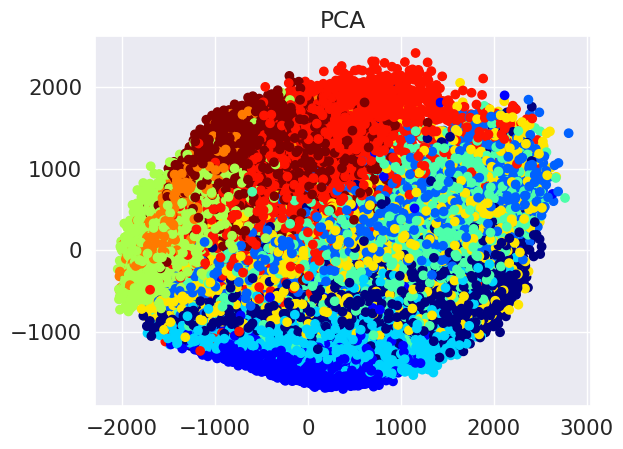

In [85]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train.reshape((len(x_train), -1)))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train, cmap='jet')
plt.title("PCA")
plt.show()

Inference: The resulting scatter plot shows how the different classes in the Fashion-MNIST dataset are distributed in the two-dimensional feature space defined by the first two principal components. This visualization can help to reveal patterns and relationships between the different classes, and can also help to identify potential outliers or anomalies in the data.

**<h1>LOGISTIC REGRESSION</h1>**

---

Logistic regression is a statistical technique used to model the relationship between a categorical dependent variable and one or more independent variables. It is commonly used for binary classification problems and predicts the probability of the dependent variable taking a particular value, based on the values of the independent variables.
The logistic function (also known as the sigmoid function) is used to transform a linear combination of the independent variables into a probability value between 0 and 1. The logistic function has an S-shaped curve that starts at 0, rises to 0.5 at the inflection point, and then approaches 1.

**<h4>Step 1: Load the dataset</h4>**


---

We load the built-in TensorFlow Fashion MNIST dataset.

In [86]:
# Load the Fashion MNIST dataset
fmnist = keras.datasets.fashion_mnist

In [87]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [88]:
training_images.shape

(60000, 28, 28)

**<h4>Step 2: Normalize the Dataset</h4>**

---
Fashion MNIST images are grayscale and have pixel values between 0 and 255. Normalizing the data to a range of 0 to 1 can help improve the performance of machine learning models. Normalization can help the model converge faster during training by reducing the range of the input features. It can also improve the generalization of the model by reducing the effect of outliers and making the data more representative of the overall population.

In [89]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

**<h4>Step 3: Reshape the input<h4>**

---
The Logistic Regression model expects a 2D array-like input, where each row represents an observation and each column represents a feature. But training data has 3 Dimensions. (60000, 28, 28).
We need to reshape the data to meet the requirements of Logistic regression. To achieve this we can flatten the 28x28 image matrix into an array of size 784.

In [90]:
training_images.shape

(60000, 28, 28)

In [91]:
# Reshape the training and testing data
training_images = training_images.reshape(training_images.shape[0], 28*28)
test_images = test_images.reshape(test_images.shape[0], 28*28)

# Print the new shape of the flattened data
print("Flattened training data shape:", training_images.shape)
print("Flattened testing data shape:", test_images.shape)

Flattened training data shape: (60000, 784)
Flattened testing data shape: (10000, 784)


**<h4>Step 4: Build the Classification Model</h4>**


---
In logistic regression, the solver is a hyperparameter that determines the optimization algorithm used to fit the logistic regression model. The solver plays a crucial role in determining the speed and accuracy of the logistic regression model.

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

'liblinear': This solver is the default solver for Scikit-learn's logistic regression implementation and is used for small-to-medium-sized datasets. It uses a coordinate descent algorithm to minimize the cost function. Coordinate descent is an optimization algorithm that updates one parameter at a time while keeping the other parameters fixed. It is well-suited for problems with a large number of features because it can update each parameter efficiently.

In [ ]:
# Train logistic regression models using different solvers
model = LogisticRegression(solver='liblinear')
model.fit(training_images, training_labels)
y_pred = model.predict(test_images)
acc = accuracy_score(test_labels, y_pred)
print(f'Solver: liblinear | Accuracy: {acc:.4f}')

Solver: liblinear | Accuracy: 0.8412


After running logistic regression with the Liblinear optimization algorithm, it took approximately 3 minutes for the algorithm to converge using 100 iterations.

In [ ]:
print("Confusion Matrix\n", metrics.confusion_matrix(test_labels,y_pred))

Confusion Matrix
 [[819   5  14  50   7   4  89   0  12   0]
 [  5 953   4  27   5   0   3   1   2   0]
 [ 27   4 732  11 133   0  83   1   9   0]
 [ 30  16  14 866  33   0  37   0   4   0]
 [  0   3 115  40 761   0  72   0   9   0]
 [  2   0   0   1   0 915   0  52  10  20]
 [147   3 128  47 108   0 539   0  28   0]
 [  0   0   0   0   0  32   0 937   1  30]
 [  6   1   6  11   3   7  15   4 947   0]
 [  0   1   0   1   0  13   1  41   0 943]]


In [ ]:
print("Classification Report\n",metrics.classification_report(test_labels,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.73      0.73      1000
           3       0.82      0.87      0.84      1000
           4       0.72      0.76      0.74      1000
           5       0.94      0.92      0.93      1000
           6       0.64      0.54      0.59      1000
           7       0.90      0.94      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



'sag': This solver is used for large datasets and stands for Stochastic Average Gradient. It uses a stochastic gradient descent algorithm with a running average of the gradient to update the model parameters. The running average makes the updates less noisy and helps the algorithm converge faster. 'sag' is well-suited for problems with a large number of samples because it can update the model parameters efficiently using mini-batches of samples.

In [ ]:
# Train logistic regression models using different solvers
model = LogisticRegression(solver='sag', max_iter = 1000)
model.fit(training_images, training_labels)
y_pred = model.predict(test_images)
acc = accuracy_score(test_labels, y_pred)
print(f'Solver: sag | Accuracy: {acc:.4f}')

Solver: sag | Accuracy: 0.8441


After running logistic regression with the SAG optimization algorithm, it took approximately 12 minutes for the algorithm to converge using 1000 iterations.

In [ ]:
print("Confusion Matrix\n", metrics.confusion_matrix(test_labels,y_pred))

Confusion Matrix
 [[806   2  11  53   4   2 111   0  11   0]
 [  4 958   3  25   4   0   3   1   2   0]
 [ 25   3 739  10 124   0  86   1  12   0]
 [ 24  17  18 861  30   0  39   0  11   0]
 [  0   2 115  36 763   0  77   0   7   0]
 [  0   0   0   1   0 922   0  48   7  22]
 [143   2 123  38 100   0 571   0  23   0]
 [  0   0   0   0   0  35   0 939   0  26]
 [  7   1   7  14   5   6  21   5 934   0]
 [  0   1   0   0   0  12   1  38   0 948]]


In [ ]:
print("Classification Report\n",metrics.classification_report(test_labels,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.74      0.76      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.93      0.93      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



L-BFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno) is a popular optimization algorithm used in logistic regression and other machine learning applications. It is a quasi-Newton method that approximates the Hessian matrix of the objective function using only a limited amount of memory, making it suitable for large-scale problems. L-BFGS works by iteratively updating the model parameters in the direction of the negative gradient of the objective function, using an approximation of the Hessian matrix to determine the step size.


In [ ]:
# Train logistic regression models using different solvers
model = LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(training_images, training_labels)
y_pred = model.predict(test_images)
acc = accuracy_score(test_labels, y_pred)
print(f'Solver: lbfgs | Accuracy: {acc:.4f}')

Solver: lbfgs | Accuracy: 0.8441



After running logistic regression with the LBFGS optimization algorithm, it took approximately 6 minutes for the algorithm to converge using 2000 iterations.

In [ ]:
print("Confusion Matrix\n", metrics.confusion_matrix(test_labels,y_pred))

Confusion Matrix
 [[806   2  11  53   4   2 111   0  11   0]
 [  4 958   3  25   4   0   3   1   2   0]
 [ 25   3 739  10 124   0  86   1  12   0]
 [ 24  17  18 861  30   0  39   0  11   0]
 [  0   2 115  37 763   0  77   0   6   0]
 [  0   0   0   1   0 922   0  48   7  22]
 [143   2 123  38 100   0 571   0  23   0]
 [  0   0   0   0   0  35   0 939   0  26]
 [  7   1   7  14   5   6  21   5 934   0]
 [  0   1   0   0   0  12   1  38   0 948]]


In [ ]:
print("Classification Report\n",metrics.classification_report(test_labels,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.74      0.76      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.93      0.93      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



**<h1>K-NEAREST NEIGHBOUR ALGORITHM </h1>**

---

K-Nearest Neighbor (or KNN) algorithm is a non-parametric classification algorithm. Backprop Neural Network from Part-1 is a parametric model parametrized by weights and bias values. Non-parametric model, contrary to the name, has a very large number of parameters. In the case of Fashion MNIST example, we will use the entire Train Set as parameters of KNN.

The basic idea behind KNN is simple. Given a (test) vector or image to classify or label, find  k  vectors or images in Train Set that are "closest" to the (test) vector or image. With the  k  closest vectors or images, there are  k  labels. Assign the most frequent label of  k  labels to the (test) vector or image.

<h1>Closeness Metric</h1> 

---

The idea of "closest" or "closeness" depends on the metric we choose to use; for instance

Euclidean Distance between two vectors  x=<x1,x2,x3>  and  y=<y1,y2,y3>  is defined as  dED:={(x1−y1)2+(x2−y2)2+(x3−y3)2}12 . In academic literature, you may see this being called L2 norm of  x−y .
L1 Distance between two vectors  x=<x1,x2,x3>  and  y=<y1,y2,y3>  is defined as  dL1:=|x1−y1|+|x2−y2|+|x3−y3| 
L0 Distance between two vectors  x=<x1,x2,x3>  and  y=<y1,y2,y3>  is defined as the number of non-zero elements in  x−y .
We will use the Euclidean distance and L0 distance.

**<h4>Step 1: Load the dataset </h4>**

---

We load the built-in TensorFlow Fashion MNIST dataset.

In [93]:
# Load the Fashion MNIST dataset
fmnist = keras.datasets.fashion_mnist

# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()



**<h4>Step 2: Plot a Sample Image</h4>**

---

Let us plot a random sample image from the dataset and show the pixel distribution matrix.

LABEL: 4

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   1   2   0   0   0  54 145 126 153 186 140  37   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   1   0   2   0  15 204 185 210 167 147 140 190 196 195   0   0   3   1   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0 159 163  69 134 208 186 202 156 169 172 156   0   1   1   1   0   0   0   0]
 [  0   0   0   0   1   1   1   0   0 198 161 112 114  66 156 148 238 221 183 212  27   0   3   0   0   0   0   0]
 [  0   0   0   1   1   0   2   0   0 182 215 108 225 185 192 159 149 206 212 184  33   0   3   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0  11 189 210 221 114 145 142 176 233 204 176 201  48   0   0   1   0   0   0   0]
 [  0   0   0   0   1   0   8 120 193 183 180 222 201 122 158 250 233 166 189 194 180  91   0   0   0   0   0   0]
 [  0   0   0   0   0  23 171 190 182 182 183 173 187 246 186 170 160 177 170 172 173 189 181   0   0   1   0   0]
 [  0   0   0   0   0 154 187 170 174 181 177 177 

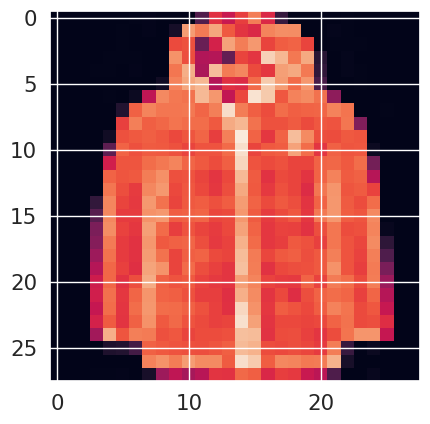

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import random

# You can put between 0 to 59999 here
index = random.randint(0,59999)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

**<h4>Step 3: Reshape the input</h4>**

---

The K Nearest Neighbour model expects a 2D array-like input, where each row represents an observation and each column represents a feature. But training data has 3 Dimensions. (60000, 28, 28). We need to reshape the data to meet the requirements of KNN. To achieve this we can flatten the 28x28 image matrix into an array of size 784.

In [95]:
# Shape of the dataset
training_images.shape

(60000, 28, 28)

In [96]:
# Reshape the training and testing data
training_images = training_images.reshape(training_images.shape[0], 28*28)
test_images = test_images.reshape(test_images.shape[0], 28*28)

# Print the new shape of the flattened data
print("Flattened training data shape:", training_images.shape)
print("Flattened testing data shape:", test_images.shape)

Flattened training data shape: (60000, 784)
Flattened testing data shape: (10000, 784)


**<h4>Step 4: Normalize the Dataset</h4>**

---

Fashion MNIST images are grayscale and have pixel values between 0 and 255. Normalizing the data to a range of 0 to 1 can help improve the performance of machine learning models. Normalization can help the model converge faster during training by reducing the range of the input features. It can also improve the generalization of the model by reducing the effect of outliers and making the data more representative of the overall population.

In [97]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

**<h4>Step 5: Build the Classification Model (Default K)</h4>**

---

Build a model using built in default K value for KNN



In [98]:
# Import sklearn modules for KNN
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(training_images, training_labels)

KNeighborsClassifier()


<h1>Complexity</h1>

---

The complexity of KNN for this example is quite high: for each image in Test Set (there are 10000 of them), we compute 60000 metrics (one each for Train image). After populating an array of 60000 metrics, we scan through this array to identify  k  smallest metrics.

**<h4>Step 6: Prediction and Evaluation (Default K)</h4>**

---

use the predict method to predict values using your KNN model and test_images

In [99]:
# Use the predict function to make predictions
predictions = KNN.predict(test_images)

Calculate the accuracy using sklearn.metrics.

In [100]:
# Import evaluation metrics from sklearn
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

Accuracy of the model

In [101]:
print('Accuracy: ',accuracy_score(test_labels, predictions)*100,'%')

Accuracy:  85.54 %


Create a confusion matrix and classification report.

In [102]:
print("Confusion Matrix\n",confusion_matrix(test_labels,predictions))

Confusion Matrix
 [[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 819  11  75   0  69   0   0   0]
 [ 41   8  15 860  39   0  34   0   3   0]
 [  2   1 126  26 773   0  71   0   1   0]
 [  1   0   0   0   0 822   5  96   1  75]
 [176   1 132  23  80   0 575   0  13   0]
 [  0   0   0   0   0   3   0 961   0  36]
 [  2   0  10   4   7   0  16   7 953   1]
 [  0   0   0   0   0   2   1  29   0 968]]


In [103]:
print("Classification Report\n",classification_report(test_labels,predictions))

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



<h1>Finding  k  Closest Vectors in Train Set </h1>

---

Given a vector (or image) from Test Set, we can't say which ones in the Train Set are closest without computing the metric over all elements in the Train Set. In the case of Fashion MNIST, we compute "closeness" metric of the vector from Test Set to every element, i.e., 60000 of them, in the Train Set and this will result in 60000 distance values. As you can imagine, if the Train Set is larger then it gets all that more time-consuming or computationally consuming to find all these distance values.

<h1>Optimizing Parameter  k </h1>

---

There is no systematic way to go about optimizing this parameter but try different "good" values for  k  and pick the one that works best. Let's review some extreme choices for  k :

If  k=1 , then labeling of the test vector or image is determined by one element in the Train Set
If  k=60000 , then label of the test vector is determined by all elements in the Train Set and if there is class imbalance, i.e., there are more images with a certain label in the Test Set, then every test vector will get the exact same label.

**<h4>Step 7: Find Optimal K value</h4>**

---
Let's go ahead and use the elbow method to pick a good K Value!<br> <br>
Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.

In [104]:
# Creating smaller samples for finding K value
x_train = training_images[0:500]
y_train = training_labels[0:500]

x_test = test_images[0:500]
y_test = test_labels[0:500]

y_test.shape

(500,)

Exploring various K values to find the minimal error

In [105]:
error_rate = []

for i in range(1,10):
  print("k=",i)
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(training_images, training_labels)
  predictions = KNN.predict(test_images)
  acc = accuracy_score(test_labels, predictions)*100
  error_rate.append(100-acc)

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9


Plot the Elbow in a graph

Text(0, 0.5, 'Error Rate')

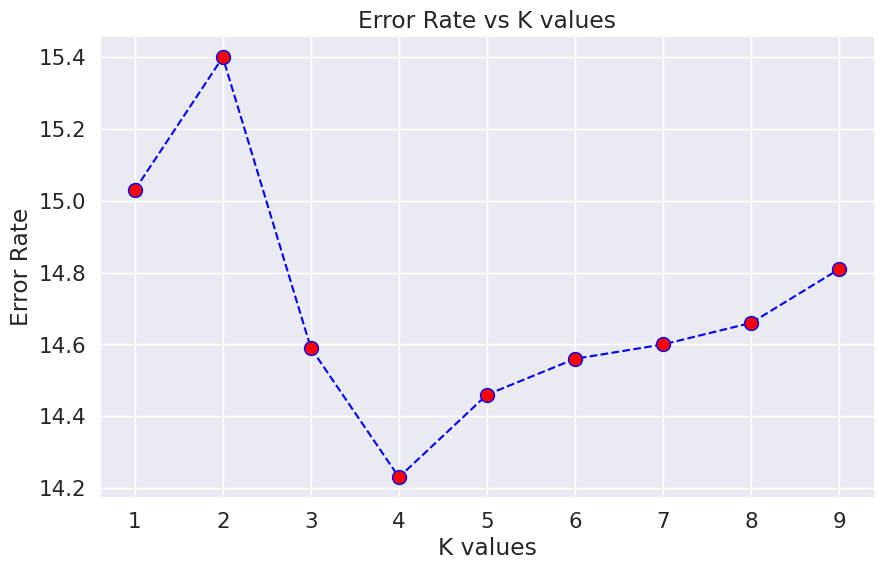

In [106]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue',marker="o",markerfacecolor="red",linestyle="dashed", markersize=10)
plt.title("Error Rate vs K values")
plt.xlabel("K values")
plt.ylabel("Error Rate")

**<h4>Step 8: Build the Classification Model (Optimal K)</h4>**

---

Use the optimal value of K to build a new model. The optimal value of K is detemined by exploring values of K and finding which one has the minimum error. 

In [107]:
# Train model with optiman K value
KNN = KNeighborsClassifier(n_neighbors=4)

KNN.fit(training_images, training_labels)

predictions = KNN.predict(test_images)

**<h4>Step 9: Prediction and Evaluation (Optimal K)</h4>**


Calculate the accuracy using sklearn.metrics.

In [108]:
# Import evaluation metrics from sklearn
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

Accuracy of the model

In [109]:
print('Accuracy: ',accuracy_score(test_labels, predictions)*100,'%')

Accuracy:  85.77 %


Create a confusion matrix and classification report.

In [110]:
print("Confusion Matrix\n",confusion_matrix(test_labels,predictions))

Confusion Matrix
 [[886   1  20  14   3   1  72   1   2   0]
 [  8 971   3  10   4   0   3   0   1   0]
 [ 27   2 831  11  69   0  60   0   0   0]
 [ 48   7  15 868  25   0  34   0   3   0]
 [  4   1 151  32 743   0  67   0   2   0]
 [  2   0   0   0   0 855   4  77   0  62]
 [198   2 143  22  79   0 545   0  11   0]
 [  0   0   0   0   0   4   0 971   0  25]
 [  3   0  13   3   5   0  18   7 951   0]
 [  0   0   0   0   0   1   1  42   0 956]]


In [111]:
print("Classification Report\n",classification_report(test_labels,predictions))

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.89      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.71      0.83      0.76      1000
           3       0.90      0.87      0.89      1000
           4       0.80      0.74      0.77      1000
           5       0.99      0.85      0.92      1000
           6       0.68      0.55      0.60      1000
           7       0.88      0.97      0.93      1000
           8       0.98      0.95      0.97      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



**<h1>CONVOLUTIONAL NEURAL NETWORKS</h1>**


---

A Convolutional Neural Network (CNN) is a type of neural network that is commonly used in machine learning for image classification and object recognition tasks. CNNs are particularly effective at these tasks because they are able to automatically learn features from the raw pixel values of images. The architecture of a CNN typically consists of several layers of convolutional and pooling operations, followed by one or more fully connected layers. The convolutional layers apply a set of learned filters to the input image, which extract features at different spatial locations. The pooling layers then downsample the feature maps by applying a max or average operation to local regions of the feature maps, which reduces the dimensionality of the feature maps and makes the network more efficient. The fully connected layers at the end of the network use the extracted features to make a prediction about the input image. The parameters of the network are learned using backpropagation and gradient descent, where the goal is to minimize a loss function that measures the difference between the predicted and actual labels.

CNNs have been very successful in many computer vision tasks, such as image classification, object detection, and semantic segmentation. They are also commonly used in other domains, such as natural language processing and speech recognition. In summary, a CNN is a type of neural network that is commonly used in machine learning for image classification and object recognition tasks. It consists of multiple layers of convolutional and pooling operations, followed by fully connected layers that use the extracted features to make a prediction. CNNs have been very successful in many computer vision tasks and are widely used in other domains as well.

**<h4>Step 1: Load the dataset</h4>**


---

We load the built-in TensorFlow Fashion MNIST dataset.


In [112]:
# Load the Fashion MNIST dataset
fmnist = keras.datasets.fashion_mnist

In [113]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


**<h4>Step 2: Plot a Sample Image</h4>**


---

Let us plot a random sample image from the dataset and show the pixel distribution matrix.

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

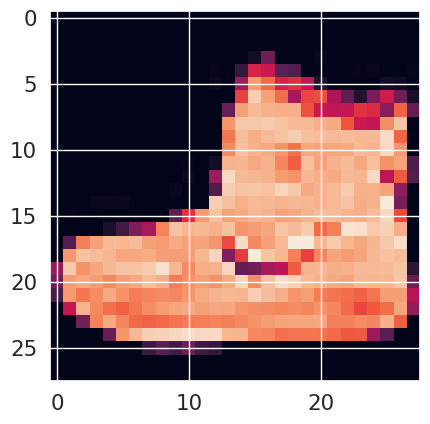

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

**<h4>Step 3: Normalize Pixel Values</h4>**


---

Normalization of pixel values should be done. The goal of normalization is to standardize the pixel values of an image so that they fall within a specific range or distribution. This is important because it can help improve the performance and convergence of the neural network during training.

In [115]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0
training_images.shape

(60000, 28, 28)

**<h4>Step 4: Build the Classification Model</h4>**


---

In deep learning, a Sequential model is a linear stack of layers that are applied in a sequential order to the input data. In the context of convolutional neural networks (CNNs), a Sequential model is a neural network architecture that is composed of a sequence of layers that are specifically designed for processing images. Let us experiment with a combination of the following layers.



<h5>Sequential:</h5>
That defines a sequence of layers in the neural network.

<h5>Flatten:</h5>
Flatten just takes an image and turns it into a 1-dimensional array.

<h5>Dense:</h5>
Adds a layer of neurons. Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but we use these for now:

<h5>ReLU:</h5>
It only passes values greater than 0 to the next layer in the network.

<h5>Softmax:</h5> 
It takes a list of values and scales these so the sum of all elements will be equal to 1. 

In [116]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Now that the model is defined, we need to build it by compiling it with an optimizer and loss function, and then we train it by calling model.fit() asking it to fit the training data to the training labels. We use:

Adam Optimizer:

The Adam optimizer is an extension of the standard stochastic gradient descent algorithm that uses adaptive learning rates and momentum to speed up convergence and improve performance in deep learning.

Sparse Categorical Crossentropy:

Sparse categorical crossentropy is a loss function used in multi-class classification problems where the target variable is represented by a single integer value representing the class label. 


In [117]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4968 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3723 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3113 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.8920


In [118]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3500 - accuracy: 0.8743


[0.3500015139579773, 0.8743000030517578]

In [119]:
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [120]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [121]:
# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [122]:
# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 40s 20ms/step - loss: 0.4788 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3190 - accuracy: 0.8841
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2758 - accuracy: 0.8987
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2457 - accuracy: 0.9093
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2215 - accuracy: 0.9185

MODEL EVALUATION:
313/313 [==============================] - 2s 6ms/step - loss: 0.2537 - accuracy: 0.9082


**<h1>RANDOM FOREST CLASSIFIER</h1>**

---

The random forest algorithm is an ensemble learning method that combines multiple decision trees to make predictions. Each decision tree in the forest is trained on a randomly sampled subset of the training data, as well as a randomly selected subset of the features. This helps to reduce the overfitting that can occur with single decision trees.

During the training process, each decision tree in the forest is constructed using a subset of the features and a random sampling of the training data. This process is repeated for a specified number of times, with each tree being trained on a different subset of the data.

The final classification is obtained by aggregating the predictions of all the trees. This aggregation can be done either by taking the majority vote of the predictions (for classification problems) or by taking the average of the predictions (for regression problems).

**<h4>Step 1: Load the dataset</h4>**


---

We load the built-in TensorFlow Fashion MNIST dataset.

In [ ]:
# Load the Fashion MNIST dataset
fmnist = keras.datasets.fashion_mnist

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**<h4>Step 2: Normalize the Dataset</h4>**

---
Fashion MNIST images are grayscale and have pixel values between 0 and 255. Normalizing the data to a range of 0 to 1 can help improve the performance of machine learning models. Normalization can help the model converge faster during training by reducing the range of the input features. It can also improve the generalization of the model by reducing the effect of outliers and making the data more representative of the overall population.

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

**<h4>Step 3: Reshape the input<h4>**

---
The RandomForestClassifier model expects a 2D array-like input, where each row represents an observation and each column represents a feature. But training data has 3 Dimensions. (60000, 28, 28).
We need to reshape the data to meet the requirements of the RandomForestClassifier. To achieve this we can flatten the 28x28 image matrix into an array of size 784.

In [ ]:
training_images.shape

(60000, 28, 28)

In [ ]:
# Reshape the training and testing data
training_images = training_images.reshape(training_images.shape[0], 28*28)
test_images = test_images.reshape(test_images.shape[0], 28*28)

# Print the new shape of the flattened data
print("Flattened training data shape:", training_images.shape)
print("Flattened testing data shape:", test_images.shape)

Flattened training data shape: (60000, 784)
Flattened testing data shape: (10000, 784)


**<h4>Step 4: Build the Classification Model</h4>**


---
For better performance of the model, hyperparameter tuning has to be performed. Hyperparameters are adjustable parameters that are set before training a machine learning model and are not learned from data during the training process. Hyperparameter tuning in a random forest involves finding the optimal values for the hyperparameters of the model, such as the number of trees, the maximum depth of each tree, the minimum number of samples required to split a node, and the minimum number of samples required to be at a leaf node. 

Grid Search is common technique for hyperparameter tuning in a random forest.
 Grid search involves defining a range of values for each hyperparameter and then evaluating the model performance for each combination of hyperparameters in a grid-like fashion. The combination of hyperparameters that results in the best model performance is then chosen as the final set of hyperparameters.

But the grid search method is an exhaustive search method that can be computationally expensive, especially for a large number of hyperparameters or a large range of hyperparameter values or a large dataset.

Instead we can use a randomized search. Like grid search, it is used to find the optimal hyperparameters for a model, but it works by sampling the hyperparameter space randomly rather than exhaustively searching it.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# Create a random forest classifier object
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# define range of values for each hyperparameter
params = {
    'max_depth': [2,5,10,20],
    'min_samples_leaf': [5,10,50,100],
    'n_estimators': [10,50,100,200]
}

# Sample 10% of the training set
sample_size = int(0.3 * len(training_images))
sample_indices = np.random.choice(range(len(training_images)), size=sample_size, replace=False)
X_train_sampled = training_images[sample_indices]
y_train_sampled = training_labels[sample_indices]

In [ ]:
# Instantiate the grid search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=params, cv=5, n_iter=30)

# Fit the grid_search object to the training data 
random_search.fit(X_train_sampled, y_train_sampled)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=30,
                   param_distributions={'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [10, 50, 100, 200]})

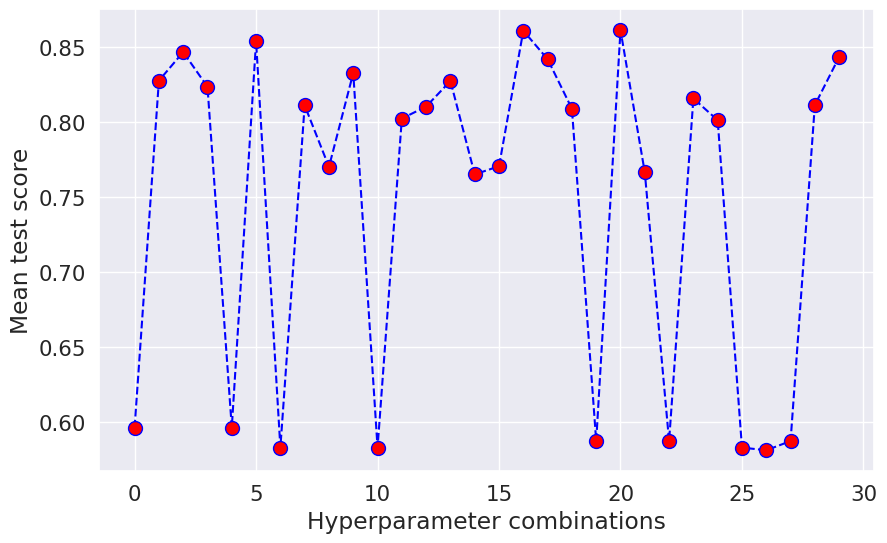

In [ ]:
# Get the mean test scores for each combination of hyperparameters
mean_test_scores = random_search.cv_results_['mean_test_score']

# Plot the mean test scores as a line graph
plt.figure(figsize=(10,6))
plt.plot(mean_test_scores,color='blue',marker="o",markerfacecolor="red",linestyle="dashed", markersize=10)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Mean test score')
plt.show()

In [ ]:
# print the best score
print(random_search.best_score_)
# Get the best estimator
rf_best = random_search.best_estimator_
rf_best

0.8612777777777778


RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
# fit the rf_best object to the training data
rf_best.fit(training_images, training_labels)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

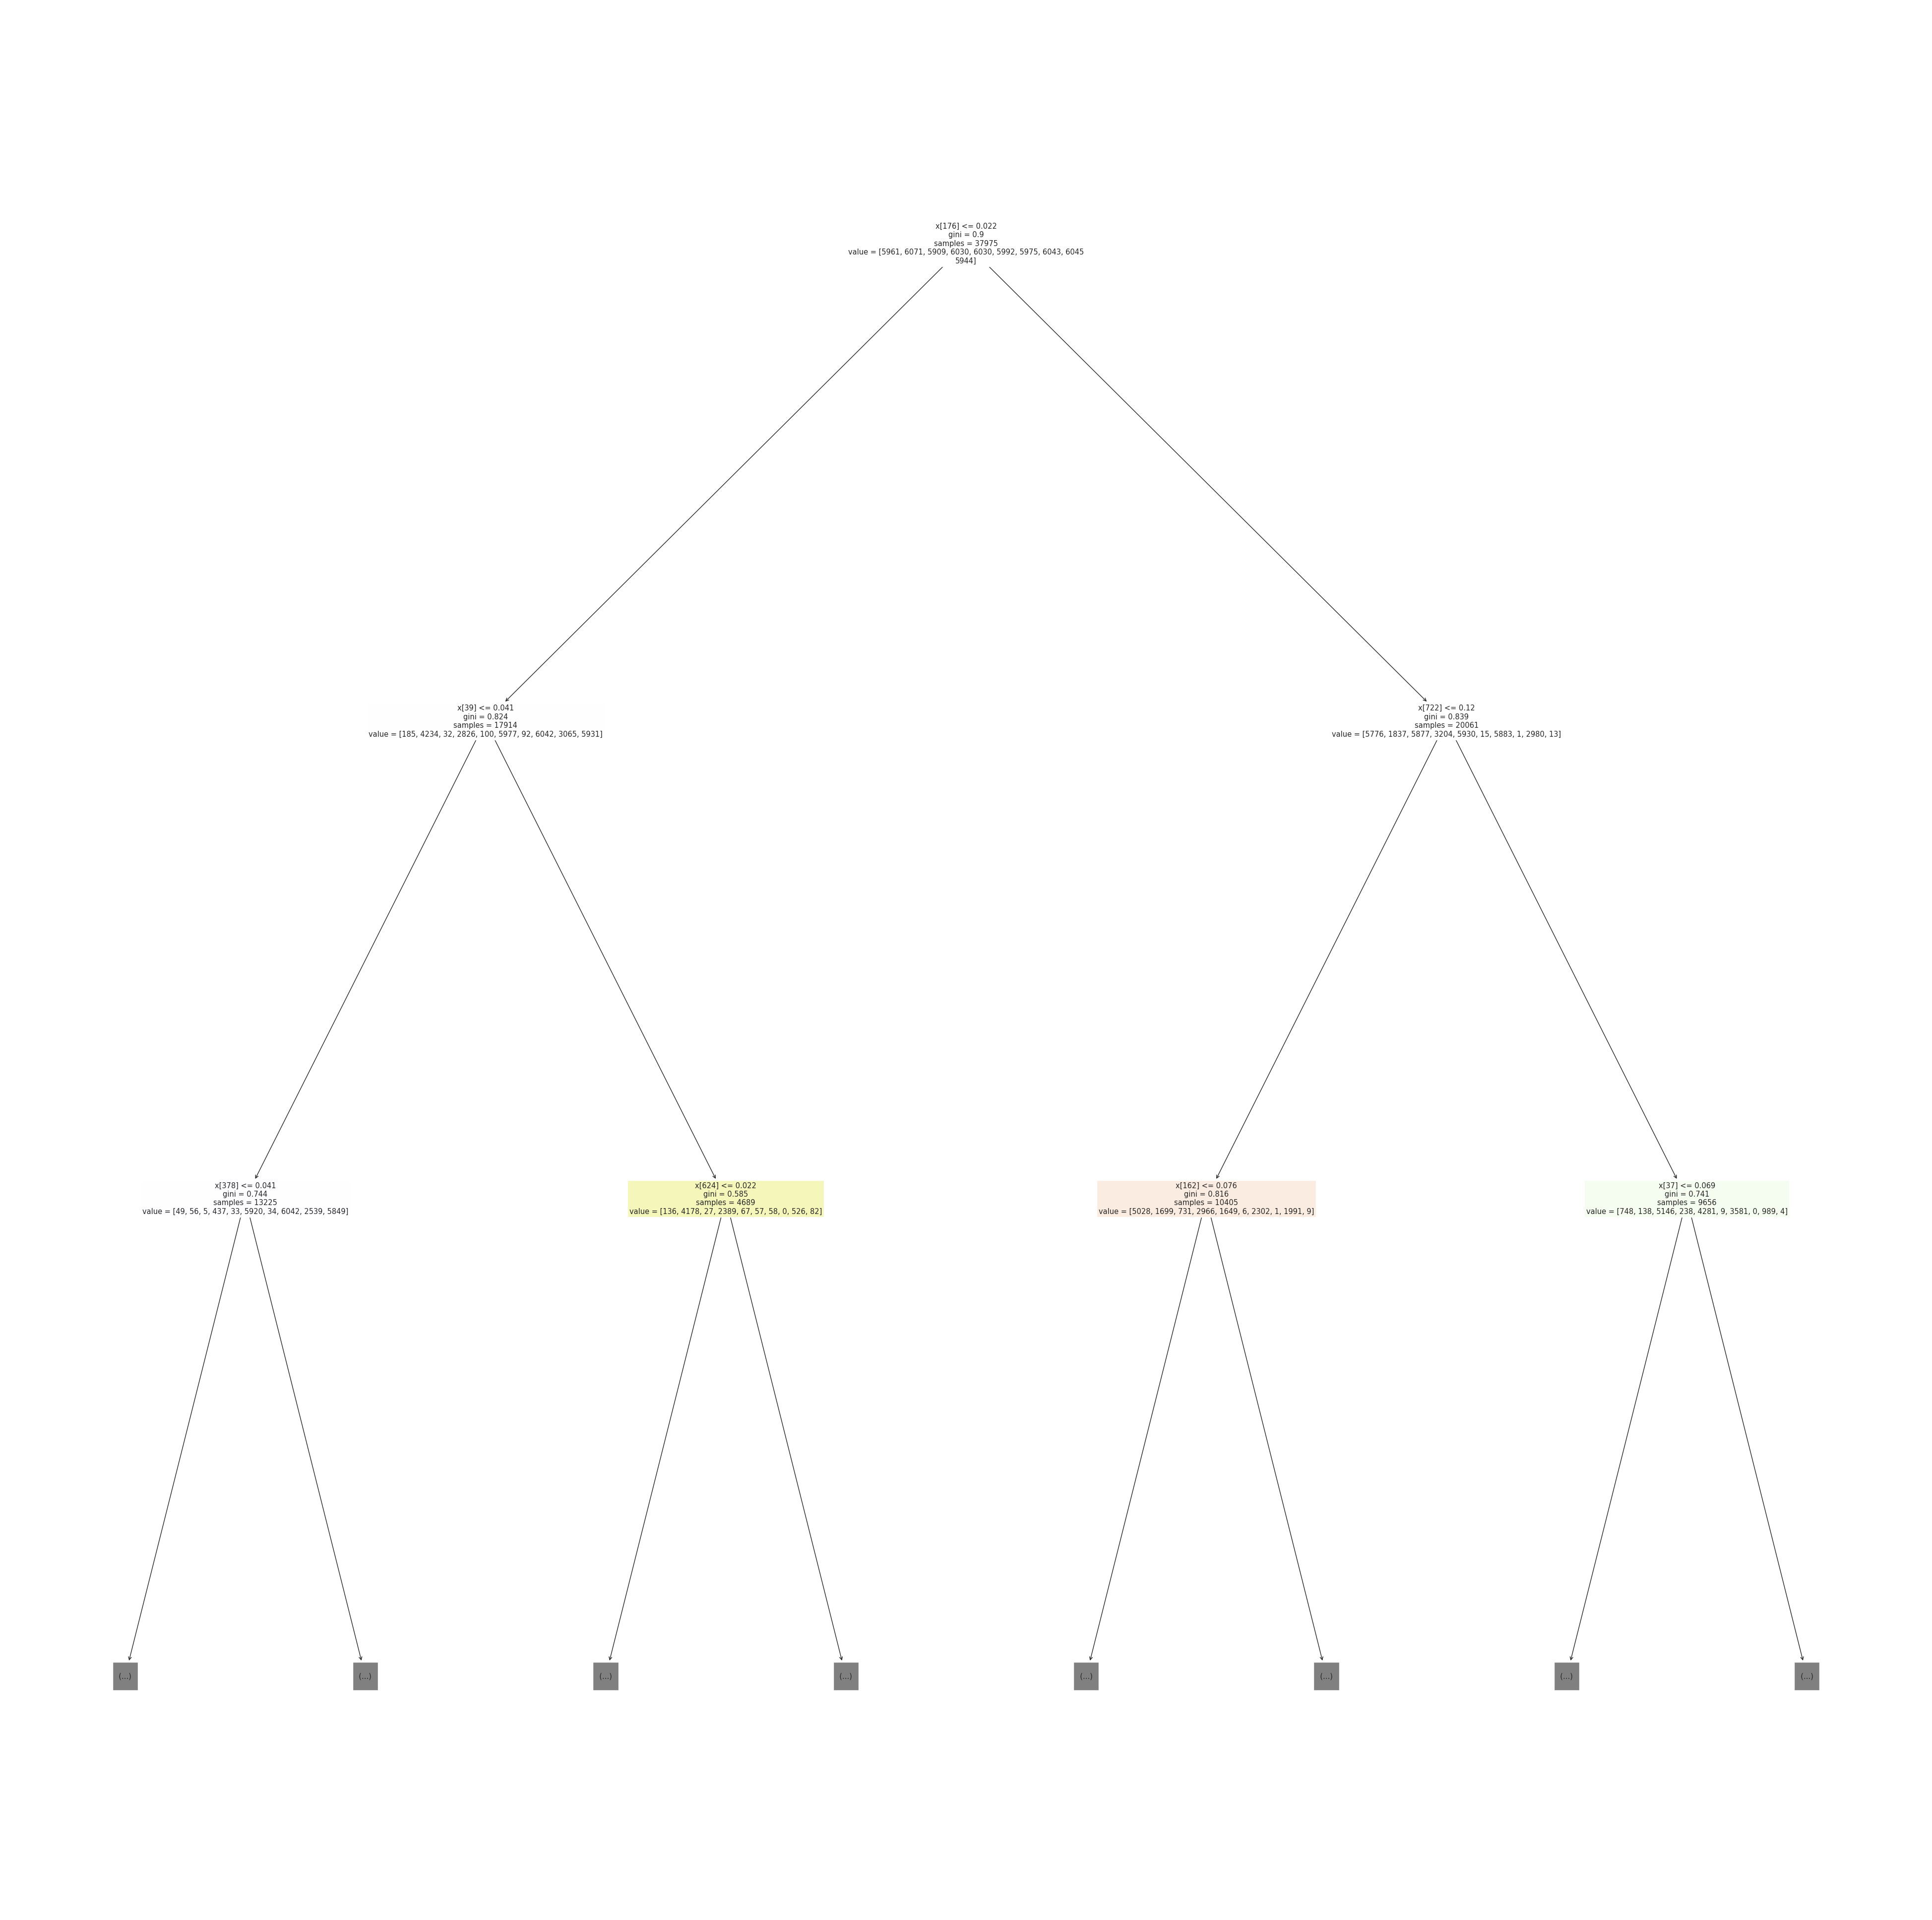

In [ ]:
# let us visualize a decision tree from the random forest
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(rf_best.estimators_[0], filled=True, max_depth = 2);

In [ ]:
# predict the test data using the best estimator
y_pred = rf_best.predict(test_images)

**<h4>Step 5: Performance of the model</h4>**

---


In [ ]:
# Print the accuracy score of model after hyperparameter tuning
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8715


In [ ]:
print("Confusion Matrix\n", confusion_matrix(test_labels,y_pred))

Confusion Matrix
 [[853   0  11  36   5   1  81   0  13   0]
 [  2 952   5  27   3   0   9   0   2   0]
 [ 12   0 787  10 132   0  54   0   5   0]
 [ 19   2  10 901  33   0  32   0   3   0]
 [  1   1  91  36 819   0  49   0   3   0]
 [  0   0   0   1   0 952   0  34   1  12]
 [149   1 125  33  91   0 583   0  18   0]
 [  0   0   0   0   0  10   0 949   0  41]
 [  0   2   5   2   5   2   8   5 971   0]
 [  0   0   0   0   0   7   1  42   2 948]]


In [ ]:
print("Classification Report\n",metrics.classification_report(test_labels,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.99      0.95      0.97      1000
           2       0.76      0.79      0.77      1000
           3       0.86      0.90      0.88      1000
           4       0.75      0.82      0.78      1000
           5       0.98      0.95      0.97      1000
           6       0.71      0.58      0.64      1000
           7       0.92      0.95      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



**<H1>ADA BOOST CLASSIFIER</H1>**


---


AdaBoost (Adaptive Boosting) is a machine learning algorithm that is used for classification problems. The algorithm works by combining multiple "weak" classifiers to form a "strong" classifier. A weak classifier is a simple model that performs slightly better than random guessing on the training data.

The AdaBoost algorithm works by assigning a weight to each training example, and then iteratively training a weak classifier on the weighted training data. After each iteration, the weights of the misclassified examples are increased, and the weights of the correctly classified examples are decreased. This makes the subsequent weak classifier focus more on the misclassified examples, which improves the overall performance of the algorithm.



**<h4>Step 1: Load the dataset</h4>**


---

We load the built-in TensorFlow Fashion MNIST dataset.

In [124]:
# Load the Fashion MNIST dataset
fmnist = keras.datasets.fashion_mnist

In [125]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

**<h4>Step 2: Normalize the Dataset</h4>**

---
Fashion MNIST images are grayscale and have pixel values between 0 and 255. Normalizing the data to a range of 0 to 1 can help improve the performance of machine learning models. Normalization can help the model converge faster during training by reducing the range of the input features. It can also improve the generalization of the model by reducing the effect of outliers and making the data more representative of the overall population.

In [126]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

**<h4>Step 3: Reshape the input<h4>**

---
The RandomForestClassifier model expects a 2D array-like input, where each row represents an observation and each column represents a feature. But training data has 3 Dimensions. (60000, 28, 28).
We need to reshape the data to meet the requirements of the RandomForestClassifier. To achieve this we can flatten the 28x28 image matrix into an array of size 784.

In [127]:
# Reshape the training and testing data
training_images = training_images.reshape(training_images.shape[0], 28*28)
test_images = test_images.reshape(test_images.shape[0], 28*28)

# Print the new shape of the flattened data
print("Flattened training data shape:", training_images.shape)
print("Flattened testing data shape:", test_images.shape)

Flattened training data shape: (60000, 784)
Flattened testing data shape: (10000, 784)


**<h4>Step 4: Build the Classification Model</h4>**


---
Now let us feed the training data to the ada boost model.  
- ada = AdaBoostClassifier(n_estimators=50, learning_rate=1): This line initializes an instance of the AdaBoostClassifier class with n_estimators=50 and learning_rate=1. n_estimators specifies the number of weak learners (decision trees) to train and learning_rate controls the contribution of each weak learner to the final ensemble. AdaBoost combines these weak learners into a strong ensemble classifier by assigning higher weights to misclassified samples in each subsequent iteration.

- model = ada.fit(training_images, training_labels): This line fits the AdaBoost classifier to the training dataset (training_images and training_labels). The fit() method trains the ensemble of decision trees using the AdaBoost algorithm and returns a trained model that can be used for making predictions.

- predictions = model.predict(test_images): This line applies the trained model to the test dataset (test_images) to make predictions for each input image. The predict() method takes an input image and returns a predicted class label based on the learned decision rules of the AdaBoost ensemble.

In [128]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [130]:
ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.5)

model = ada.fit(training_images, training_labels)

prediction = model.predict(test_images)

**<h4>Step 5: Performance of the model</h4>**

---


In [131]:
# Import evaluation metrics from sklearn
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [132]:
print('Accuracy: ',accuracy_score(test_labels, prediction)*100,'%')

Accuracy:  62.57 %


In [133]:
print("Confusion Matrix\n",confusion_matrix(test_labels,prediction))

Confusion Matrix
 [[506   7  52 200  16   0 203   0  16   0]
 [  6 695  13 254   5   0  27   0   0   0]
 [ 77   0 580   9 277   0  52   0   5   0]
 [ 11  14  83 793  62   0  31   0   6   0]
 [ 14   0 177  52 719   0  32   0   6   0]
 [  0   0   1   0   0 872   0  81  23  23]
 [107   8 203 118 353   0 186   0  25   0]
 [  0   0   0   0   0 367   0 626   3   4]
 [ 14   0   6   3   8   4  58   3 904   0]
 [  0   0   0   0   0 282   0 334   8 376]]


In [134]:
print("Classification Report\n",classification_report(test_labels,prediction))

Classification Report
               precision    recall  f1-score   support

           0       0.69      0.51      0.58      1000
           1       0.96      0.69      0.81      1000
           2       0.52      0.58      0.55      1000
           3       0.55      0.79      0.65      1000
           4       0.50      0.72      0.59      1000
           5       0.57      0.87      0.69      1000
           6       0.32      0.19      0.23      1000
           7       0.60      0.63      0.61      1000
           8       0.91      0.90      0.91      1000
           9       0.93      0.38      0.54      1000

    accuracy                           0.63     10000
   macro avg       0.66      0.63      0.62     10000
weighted avg       0.66      0.63      0.62     10000



**<h1>INFERENCE</h1>**


---

To summarise, the performance of each algorithm on the dataset is given below:
1. Logistic Regression : 84.38 %
2. K-Nearest Neighbours : 85.77 %
3. Convolutional Neural Networks : 90.20 %
4. Random Forest : 87.15 %
5. AdaBoost: 62.57 %

We see that Convolutional Neural Networks has performed the best with an accuracy score of about 90%, followed by k-Nearest Neighbours and Logistic Regression. This concludes our analysis.